In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
MouseAndDrugData = pd.read_csv(mouse_drug_data_to_load)
ClinicalTrialData = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset

#CombinedData = ClinicalTrialData.merge(MouseAndDrugData, on="Mouse ID", how = 'outer')
CombinedData = pd.merge(ClinicalTrialData, MouseAndDrugData, on="Mouse ID", how = 'left')
# Display the data table for preview

CombinedData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
MeanTumerVolume = CombinedData.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
#MeanTumerVolume = pd.DataFrame(MeanTumerVolume) # groups by the drugs
MeanTumerVolume = pd.DataFrame(MeanTumerVolume).reset_index()

# Preview DataFrame
#pd.set_option('display.max_rows', MeanTumerVolume.shape[0])
MeanTumerVolume

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
TumerVolumeSE = CombinedData.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
TumerVolumeSE = pd.DataFrame(TumerVolumeSE).reset_index()
# Preview DataFrame
TumerVolumeSE.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
MeanTumerVolume = MeanTumerVolume.reset_index()
MeanTumerVolumeTable = MeanTumerVolume.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
MeanTumerVolumeTable.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
# Minor Data Munging to Re-Format the Data Frames
TumerVolumeSE = TumerVolumeSE.reset_index()
TumerVolumeSETable = TumerVolumeSE.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
TumerVolumeSETable.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


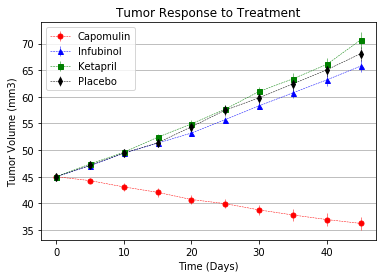

In [6]:
# Generate the Plot (with Error Bars)

plt.errorbar(MeanTumerVolumeTable.index, MeanTumerVolumeTable["Capomulin"], yerr=TumerVolumeSETable["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Capomulin")
plt.errorbar(MeanTumerVolumeTable.index, MeanTumerVolumeTable["Infubinol"], yerr=TumerVolumeSETable["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50, label="Infubinol")
plt.errorbar(MeanTumerVolumeTable.index, MeanTumerVolumeTable["Ketapril"], yerr=TumerVolumeSETable["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50, label="Ketapril")
plt.errorbar(MeanTumerVolumeTable.index, MeanTumerVolumeTable["Placebo"], yerr=TumerVolumeSETable["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50, label="Placebo")

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(axis="y")
plt.legend(loc="upper left")
#legend(loc="best", fontsize="small", fancybox=True)


# Save the Figure
plt.savefig("data/TumorResponseToTreatment.png")

# Show the Figure
plt.show()

In [7]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
MetastaticSitesMean = CombinedData.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()
# Convert to DataFrame
MetastaticSitesMean = pd.DataFrame(MetastaticSitesMean)
# Preview DataFrame
MetastaticSitesMean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
MetastaticSitesSE = CombinedData.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()
# Convert to DataFrame
MetastaticSitesSE = pd.DataFrame(MetastaticSitesSE)
# Preview DataFrame
MetastaticSitesSE.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
# Minor Data Munging to Re-Format the Data Frames
MetastaticTable_Mean = pd.pivot_table(MetastaticSitesMean, index=['Timepoint'], columns=['Drug']) 

# Preview that Reformatting worked
MetastaticTable_Mean = MetastaticTable_Mean.loc[ : , 'Metastatic Sites']
MetastaticTable_Mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [11]:
# Minor Data Munging to Re-Format the Data Frames
MetastaticTable_SE = pd.pivot_table(MetastaticSitesSE, index=['Timepoint'], columns=['Drug']) 

# Preview that Reformatting worked
MetastaticTable_SE = MetastaticTable_SE.loc[ : , 'Metastatic Sites']
MetastaticTable_SE.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


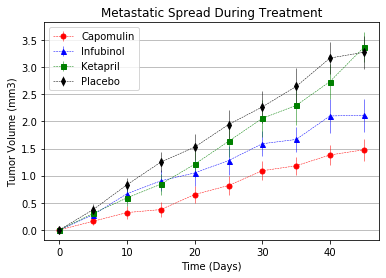

In [12]:
# Generate the Plot (with Error Bars)
plt.errorbar(MetastaticTable_Mean.index, MetastaticTable_Mean["Capomulin"], yerr=MetastaticTable_SE["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Capomulin")
plt.errorbar(MetastaticTable_Mean.index, MetastaticTable_Mean["Infubinol"], yerr=MetastaticTable_SE["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50, label="Infubinol")
plt.errorbar(MetastaticTable_Mean.index, MetastaticTable_Mean["Ketapril"], yerr=MetastaticTable_SE["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50, label="Ketapril")
plt.errorbar(MetastaticTable_Mean.index, MetastaticTable_Mean["Placebo"], yerr=MetastaticTable_SE["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50, label="Placebo")

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(axis="y")
plt.legend(loc="upper left")

# Save the Figure
plt.savefig("data/TumorMetastasisDuringTreatment.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
MiceCount = CombinedData.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()
# Convert to DataFrame
MiceCount = pd.DataFrame({"Mouse Count":MiceCount})
MiceCount.reset_index(inplace = True)
# Preview DataFrame
MiceCount.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
# Minor Data Munging to Re-Format the Data Frames
SurvivalRateTable = MiceCount.pivot(index='Timepoint',columns='Drug',values='Mouse Count')
# Preview the Data Frame
SurvivalRateTable.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


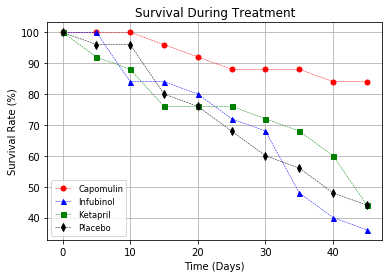

In [15]:
# Generate the Plot (Accounting for percentages)

plt.plot(100 * SurvivalRateTable["Capomulin"] / 25, "ro", linestyle="dashed", markersize=5, linewidth=0.50, label="Capomulin")
plt.plot(100 * SurvivalRateTable["Infubinol"] / 25, "b^", linestyle="dashed", markersize=5, linewidth=0.50, label="Infubinol")
plt.plot(100 * SurvivalRateTable["Ketapril"] / 25, "gs", linestyle="dashed", markersize=5, linewidth=0.50, label="Ketapril")
plt.plot(100 * SurvivalRateTable["Placebo"] / 25 ,  color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50, label="Placebo")
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("data/SurvivalDuringTreatment.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug
TumorSizeChangePercent =  (MeanTumerVolumeTable.iloc[-1] - MeanTumerVolumeTable.iloc[0])*100 / MeanTumerVolumeTable.iloc[0]
TumorSizeSEChangePercent = (TumerVolumeSETable.iloc[-1] - TumerVolumeSETable.iloc[0])*100 / TumerVolumeSETable.iloc[0]

# Display the data to confirm
TumorSizeChangePercent

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

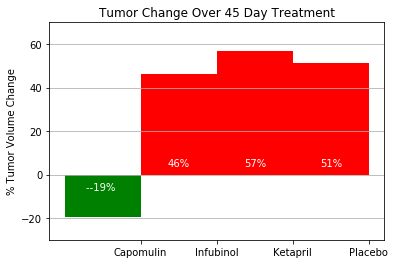

In [17]:
# Store all Relevant Percent Changes into a Tuple
TumorPercentChenge = (TumorSizeChangePercent["Capomulin"], 
               TumorSizeChangePercent["Infubinol"], 
               TumorSizeChangePercent["Ketapril"], 
               TumorSizeChangePercent["Placebo"])
# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(TumorPercentChenge))  
width = 1
rectsPass = ax.bar(ind[0], TumorPercentChenge[0], width, color='green')
rectsFail = ax.bar(ind[1:], TumorPercentChenge[1:], width, color='red')


# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(axis="y")

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")
# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
#fig.savefig("analysis/Fig4.png")
plt.savefig("data/TumorChangeOver45DayTreatment.png")
# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)